<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/show_image_online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code load ROOT, python 2 environment. Runs this part only the first time.

In [41]:
!mkdir -p APPS
!pwd
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz

import sys
sys.path.append("/content/APPS/root/lib")
import ctypes
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')
!pip install root-numpy
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGpad.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTreePlayer.so')

/content
--2019-11-22 12:21:41--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.2’

root_v6.13.08.Linux 100%[===================>] 131.05M  26.5MB/s    in 5.7s    

2019-11-22 12:21:48 (22.9 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.2’ saved [137415272/137415272]



<CDLL '/content/APPS/root/lib/libTreePlayer.so', handle 561f81ffe500 at 7f91047e67d0>

Load the funcion to retrive data from swift CYGNO server

In [0]:
import matplotlib.pyplot as plt
import numpy as np    
import ROOT
from root_numpy import hist2array
%matplotlib inline


def swift_root_file(sel, run):
    BASE_URL  = "https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/"
    file_root = ('Data/'+sel+'/histograms_Run%05d.root' % run)
    return BASE_URL+file_root

def reporthook(blocknum, blocksize, totalsize):
    import sys
    readsofar = blocknum * blocksize
    if totalsize > 0:
        percent = readsofar * 1e2 / totalsize
        s = "\r%5.1f%% %*d / %d" % (
            percent, len(str(totalsize)), readsofar, totalsize)
        sys.stderr.write(s)
        if readsofar >= totalsize: # near the end
            sys.stderr.write("\n")
    else: # total size is unknown
        sys.stderr.write("read %d\n" % (readsofar,))

def swift_read_root_file(url):
    import ROOT
    import os
    from urllib import urlretrieve
    tmpname = "./tmp." + str(os.getpid()) + ".root"
    urlretrieve(url, tmpname, reporthook)
    f  = ROOT.TFile.Open(tmpname);
    os.remove(tmpname)
    return f   

def root_TH2_name(root_file):
    pic = []
    wfm = []
    for i,e in enumerate(root_file.GetListOfKeys()):
        che = e.GetName()
        print (che)
        if ('pic_run' in str(che)):
            pic.append(che)
        elif ('wfm_run' in str(che)):
            wfm.append(che)
    return pic, wfm

100.0% 382746624 / 382738913


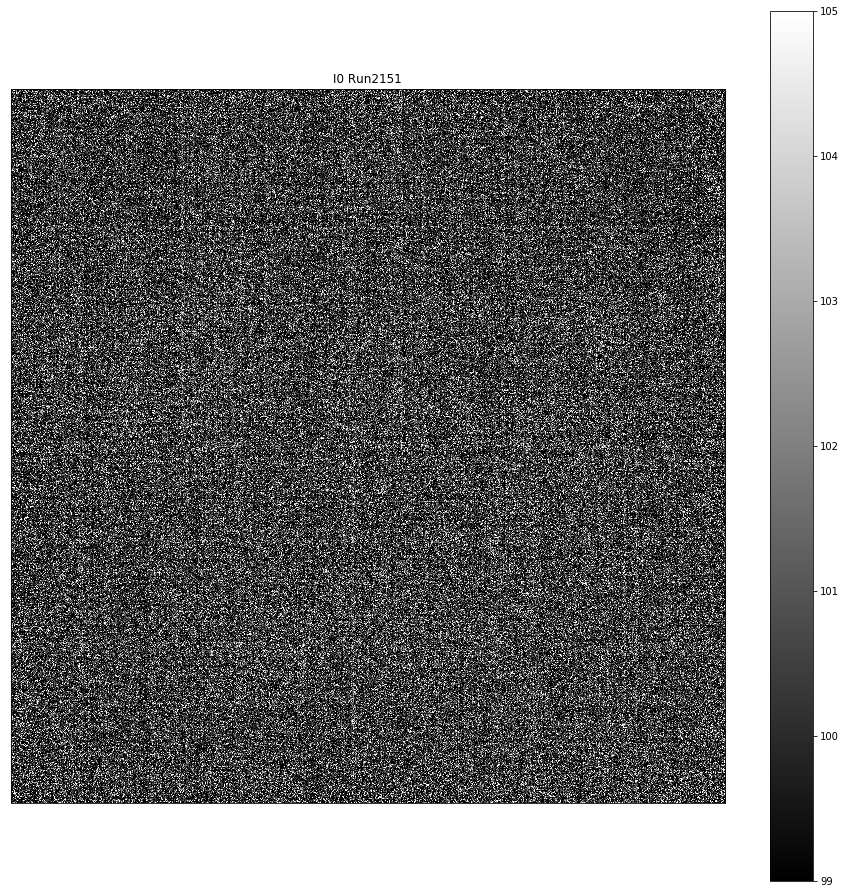

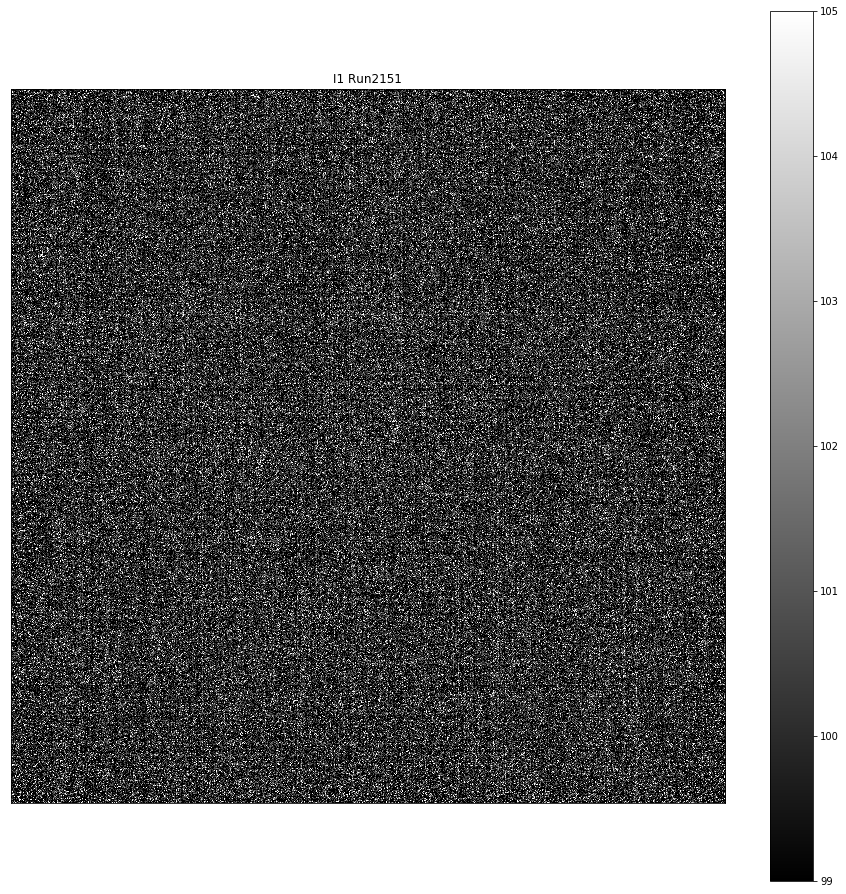

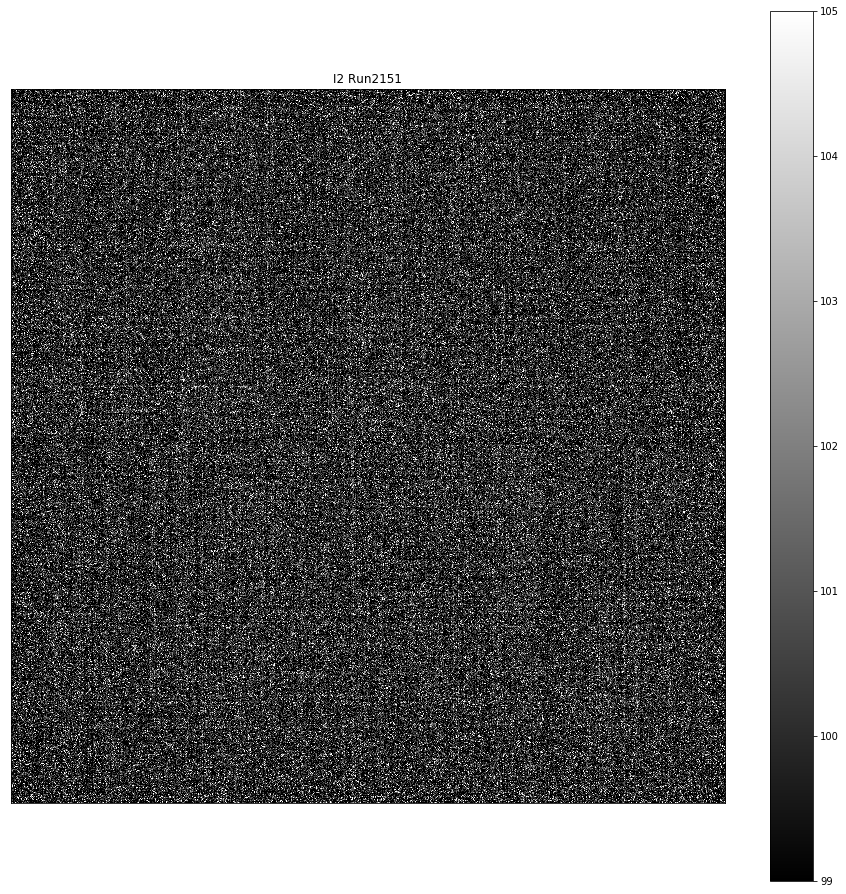

In [43]:
# - - Setup Variables - - #
save = 0

run = '02151'
ini = 0
end = ini+3

try:

    print ('Downloading and open file: '+swift_root_file('LAB', int(run)))
    tf2 = swift_read_root_file(swift_root_file('LAB', int(run)))
    for traccia in range(ini,end):

        picname = 'pic_run%s_ev%d' % (run,traccia)
        imageth2 = tf2.Get(picname)
        image = hist2array(imageth2)
        fig = plt.figure(figsize=(16,16))
        plt.title("I%d Run%d" % (traccia, int(run)))
        plt.imshow(image.T, cmap="gray", vmin=99,vmax=105)
        plt.xticks([])
        plt.yticks([])
        plt.colorbar()
        #plt.savefig('/Volumes/Mac_DATA/Cygnus/Data/BTF_2017-2/Data_Image/I%dRun%d_FNG.eps' % (traccia, run), format='eps')
        if save == 1:
            plt.savefig('./images/I%dRun%s.png' % (traccia, run), format='png',  dpi = 400, bbox_inches = 'tight', pad_inches = 0)
        plt.show()

except:
    
    print ("histogram_Run%s not found, skip for the next..." % run)
    
    